# King County House Price Analysis and Prediction
### Name: Zihan Ding

## Summary statistic of the data

In [660]:
import warnings
warnings.filterwarnings("ignore")

In [661]:
import pandas as pd
data_train = pd.read_csv('training_set.csv')
data_test = pd.read_csv('test_set.csv')
data_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2473350710,20141027T000000,390000,4,1.75,2330,8364,1.0,0,0,...,8,2330,0,1968,0,98058,47.4568,-122.146,2180.0,9630.0
1,7100000250,20150211T000000,380000,3,1.00,1400,8710,1.0,0,0,...,7,1400,0,1948,0,98146,47.5066,-122.377,1460.0,8710.0
2,1443500725,20150423T000000,280000,3,1.00,1350,7553,1.5,0,0,...,6,1350,0,1914,0,98118,47.5345,-122.274,1380.0,7470.0
3,2321059093,20140805T000000,506000,3,2.50,2100,213008,1.0,0,0,...,8,2100,0,1990,0,98092,47.2984,-122.144,1330.0,214315.0
4,6675500082,20140812T000000,455000,3,2.50,1600,7829,2.0,0,0,...,7,1600,0,1987,0,98034,47.7288,-122.227,1580.0,9104.0


In [662]:
data_test.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,98020220,20141030T000000,4,2.50,3210,8938,2.0,0,0,3,10,3210,0,2005,0,98075,47.5820,-121.971,3740,8108
1,9320350020,20140630T000000,4,3.00,2330,3497,2.0,0,0,3,9,1920,410,2003,0,98108,47.5540,-122.308,2330,5242
2,7899800857,20141215T000000,2,2.00,1070,635,2.0,0,0,3,9,720,350,2008,0,98106,47.5212,-122.357,1070,928
3,3904990030,20140709T000000,4,2.50,2570,5250,2.0,0,0,3,8,2570,0,1990,0,98029,47.5763,-122.000,2260,5392
4,4100000050,20141030T000000,3,1.75,2080,11866,1.0,0,0,3,8,2080,0,1960,0,98005,47.5872,-122.173,2240,10696


In [663]:
data_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.600000e+04,1.600000e+04,16000.000000,16000.00000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15999.000000,15999.000000,15999.000000
mean,4.577050e+09,5.389266e+05,3.371875,2.09675,2071.998000,1.513216e+04,1.470000,0.007437,0.237687,3.425063,7.637375,1775.186187,296.811812,1969.656563,90.300062,98077.791500,47.560614,-122.214162,1984.452903,12807.790424
std,2.871337e+09,3.689265e+05,0.933415,0.76102,906.540138,3.936487e+04,0.528996,0.085922,0.770701,0.660047,1.172322,816.283649,446.135983,28.908309,414.811627,53.747044,0.138874,0.139513,680.831264,26563.208232
min,1.000102e+06,7.500000e+04,0.000000,0.00000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.000000,-122.519000,460.000000,659.000000
25%,2.125049e+09,3.200000e+05,3.000000,1.50000,1420.000000,5.150000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469950,-122.327000,1490.000000,5200.000000
50%,3.904920e+09,4.500000e+05,3.000000,2.25000,1910.000000,7.703000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1973.000000,0.000000,98065.000000,47.573250,-122.229000,1840.000000,7695.000000
75%,7.304300e+09,6.450000e+05,4.000000,2.50000,2540.000000,1.080175e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2190.000000,580.000000,1994.000000,0.000000,98117.000000,47.678600,-122.125000,2350.000000,10125.000000
max,9.900000e+09,7.700000e+06,33.000000,8.00000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [664]:
data_test.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.222000e+03,4222.000000,4222.000000,4222.000000,4.222000e+03,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000,4222.000000
mean,4.583428e+09,3.364993,2.101551,2073.425154,1.570606e+04,1.479631,0.009237,0.240881,3.426101,7.643060,1781.012553,292.412601,1969.644718,78.960208,98079.130033,47.560198,-122.216715,1970.857414,12892.262909
std,2.887675e+09,0.918698,0.789954,935.261241,4.667929e+04,0.530909,0.095677,0.787251,0.655638,1.181582,844.562103,440.260745,28.877660,389.144878,53.941108,0.139337,0.142688,681.242679,28489.226317
min,1.200019e+06,0.000000,0.000000,380.000000,6.350000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,651.000000
25%,2.113700e+09,3.000000,1.500000,1430.000000,5.200000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.470125,-122.331000,1480.000000,5194.000000
50%,4.007200e+09,3.000000,2.250000,1900.000000,7.700000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1547.000000,0.000000,1972.000000,0.000000,98070.000000,47.570750,-122.242000,1830.000000,7700.000000
75%,7.334501e+09,4.000000,2.500000,2530.000000,1.087875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2180.000000,567.500000,1994.000000,0.000000,98118.000000,47.678900,-122.128250,2340.000000,10322.250000
max,9.839301e+09,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6110.000000,858132.000000


In [665]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 21 columns):
id               16000 non-null int64
date             16000 non-null object
price            16000 non-null int64
bedrooms         16000 non-null int64
bathrooms        16000 non-null float64
sqft_living      16000 non-null int64
sqft_lot         16000 non-null int64
floors           16000 non-null float64
waterfront       16000 non-null int64
view             16000 non-null int64
condition        16000 non-null int64
grade            16000 non-null int64
sqft_above       16000 non-null int64
sqft_basement    16000 non-null int64
yr_built         16000 non-null int64
yr_renovated     16000 non-null int64
zipcode          16000 non-null int64
lat              16000 non-null float64
long             15999 non-null float64
sqft_living15    15999 non-null float64
sqft_lot15       15999 non-null float64
dtypes: float64(6), int64(14), object(1)
memory usage: 2.6+ MB


In [666]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4222 entries, 0 to 4221
Data columns (total 20 columns):
id               4222 non-null int64
date             4222 non-null object
bedrooms         4222 non-null int64
bathrooms        4222 non-null float64
sqft_living      4222 non-null int64
sqft_lot         4222 non-null int64
floors           4222 non-null float64
waterfront       4222 non-null int64
view             4222 non-null int64
condition        4222 non-null int64
grade            4222 non-null int64
sqft_above       4222 non-null int64
sqft_basement    4222 non-null int64
yr_built         4222 non-null int64
yr_renovated     4222 non-null int64
zipcode          4222 non-null int64
lat              4222 non-null float64
long             4222 non-null float64
sqft_living15    4222 non-null int64
sqft_lot15       4222 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 659.8+ KB


In [667]:
data_train.shape

(16000, 21)

In [668]:
data_test.shape

(4222, 20)

## Data Cleaning

In [669]:
# concatenate train and test datasets 
y_train = data_train.price.values
data = pd.concat((data_train, data_test)).reset_index(drop=True)
data.drop(['price'], axis=1, inplace=True)

In [670]:
# check duplicates
idcount = data.groupby('id')['date'].count()
idcount = idcount.sort_values(ascending=False)
idcount[0:5]

id
795000620     3
1000102       2
526059224     2
2561340020    2
2560801222    2
Name: date, dtype: int64

In [671]:
# looks like there are some duplicates
# check by id, found out they are same house with different sale dates and prices
# therefore cannot count as duplicates
data[data.id == 795000620]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
10986,1.0,3,2,20150311T000000,1.0,5,795000620,47.5045,-122.33,1080,0,1080,1070.0,6250,6250.0,0,0,1950,0,98168
14680,1.0,3,2,20140924T000000,1.0,5,795000620,47.5045,-122.33,1080,0,1080,1070.0,6250,6250.0,0,0,1950,0,98168
14785,1.0,3,2,20141215T000000,1.0,5,795000620,47.5045,-122.33,1080,0,1080,1070.0,6250,6250.0,0,0,1950,0,98168


In [672]:
# check missing data
data.isnull().sum()

bathrooms        0
bedrooms         0
condition        0
date             0
floors           0
grade            0
id               0
lat              0
long             1
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    1
sqft_lot         0
sqft_lot15       1
view             0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [673]:
# fill up missing data with mean
for f in ['long', 'sqft_living15', 'sqft_lot15']:
    data.loc[data[f].isnull(), f] = data[f].mean()

In [674]:
data.isnull().sum()

bathrooms        0
bedrooms         0
condition        0
date             0
floors           0
grade            0
id               0
lat              0
long             0
sqft_above       0
sqft_basement    0
sqft_living      0
sqft_living15    0
sqft_lot         0
sqft_lot15       0
view             0
waterfront       0
yr_built         0
yr_renovated     0
zipcode          0
dtype: int64

In [675]:
# check data types
data.dtypes

bathrooms        float64
bedrooms           int64
condition          int64
date              object
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15    float64
sqft_lot           int64
sqft_lot15       float64
view               int64
waterfront         int64
yr_built           int64
yr_renovated       int64
zipcode            int64
dtype: object

## Check outliers

In [676]:
data[data.bedrooms > 10]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode
4620,3.00,11,3,20140821T000000,2.0,7,1773100755,47.5560,-122.363,2400,600,3000,1420.0,4960,4960.0,0,0,1918,1999,98106
13898,1.75,33,5,20140625T000000,1.0,7,2402100895,47.6878,-122.331,1040,580,1620,1330.0,6000,4700.0,0,0,1947,0,98103


In [677]:
data.loc[data['bedrooms'] > 10, 'bedrooms'] = 10
data.loc[data['bathrooms'] > 5, 'bathrooms'] = 5

In [678]:
data[data.bedrooms > 10]

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,view,waterfront,yr_built,yr_renovated,zipcode


In [679]:
data.dtypes

bathrooms        float64
bedrooms           int64
condition          int64
date              object
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15    float64
sqft_lot           int64
sqft_lot15       float64
view               int64
waterfront         int64
yr_built           int64
yr_renovated       int64
zipcode            int64
dtype: object

## Feature transformation and categorical features encoding

In [680]:
# convert date to datetime
import datetime as dt
data['date'] = pd.to_datetime(data['date'])

In [681]:
# add column month
data['month'] = data['date'].dt.month

In [682]:
# create dummy variables for month
dummies = pd.get_dummies(data['month'], drop_first=False)
dummies = dummies.add_prefix("{}#".format('month'))
data.drop('month', axis=1, inplace=True)
data = data.join(dummies)

In [683]:
# convert yr_built to years_built
data['years_built'] = data['date'].dt.year - data['yr_built']

In [684]:
# convert sqft_basement into 0-with no basement, 1-with basement
data.loc[data['sqft_basement'] != 0, 'sqft_basement'] = 1

In [685]:
# convert yr_renovated into 0-never renovated, 1-renovated
data.loc[data['yr_renovated'] != 0, 'yr_renovated'] = 1

In [686]:
# group location by zipcode
seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 
           98111, 98112, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 
           98122, 98124, 98125, 98126, 98131, 98132, 98133, 98134, 98136,
           98138, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160,
           98161, 98164, 98166, 98168, 98171, 98174, 98177, 98178, 98188, 98198, 98199]
bellevue = [98004, 98005, 98006, 98007, 98008, 98009, 98015, 98039, 98040]
north = [98011, 98019, 98015, 98027, 98028, 98033, 98034, 98041, 98052, 
         98053, 98072, 98073, 98074, 98075, 98083, 98133, 98224, 98288]

In [687]:
# categorize zipcode
data['location'] = data['zipcode'].apply(
    lambda x: 'seattle' if x in seattle else ('bellevue' if x in bellevue else ('north' if x in north else 'south')))
data.drop(['zipcode'], axis=1, inplace=True)

In [688]:
# create dummy variables for location
dummies = pd.get_dummies(data['location'], drop_first=False)
dummies = dummies.add_prefix("{}#".format('location'))
data.drop('location', axis=1, inplace=True)
data = data.join(dummies)

In [689]:
data.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,...,month#8,month#9,month#10,month#11,month#12,years_built,location#bellevue,location#north,location#seattle,location#south
0,1.75,4,4,2014-10-27,1.0,8,2473350710,47.4568,-122.146,2330,...,0,0,1,0,0,46,0,0,0,1
1,1.00,3,4,2015-02-11,1.0,7,7100000250,47.5066,-122.377,1400,...,0,0,0,0,0,67,0,0,1,0
2,1.00,3,3,2015-04-23,1.5,6,1443500725,47.5345,-122.274,1350,...,0,0,0,0,0,101,0,0,1,0
3,2.50,3,3,2014-08-05,1.0,8,2321059093,47.2984,-122.144,2100,...,1,0,0,0,0,24,0,0,0,1
4,2.50,3,3,2014-08-12,2.0,7,6675500082,47.7288,-122.227,1600,...,1,0,0,0,0,27,0,1,0,0


In [690]:
data.dtypes

bathrooms                   float64
bedrooms                      int64
condition                     int64
date                 datetime64[ns]
floors                      float64
grade                         int64
id                            int64
lat                         float64
long                        float64
sqft_above                    int64
sqft_basement                 int64
sqft_living                   int64
sqft_living15               float64
sqft_lot                      int64
sqft_lot15                  float64
view                          int64
waterfront                    int64
yr_built                      int64
yr_renovated                  int64
month#1                       uint8
month#2                       uint8
month#3                       uint8
month#4                       uint8
month#5                       uint8
month#6                       uint8
month#7                       uint8
month#8                       uint8
month#9                     

In [691]:
data.isnull().sum()

bathrooms            0
bedrooms             0
condition            0
date                 0
floors               0
grade                0
id                   0
lat                  0
long                 0
sqft_above           0
sqft_basement        0
sqft_living          0
sqft_living15        0
sqft_lot             0
sqft_lot15           0
view                 0
waterfront           0
yr_built             0
yr_renovated         0
month#1              0
month#2              0
month#3              0
month#4              0
month#5              0
month#6              0
month#7              0
month#8              0
month#9              0
month#10             0
month#11             0
month#12             0
years_built          0
location#bellevue    0
location#north       0
location#seattle     0
location#south       0
dtype: int64

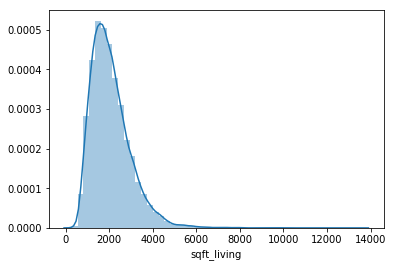

In [692]:
# check histogram of the sqft_living distribution
# it is highly right skewed
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
sns.distplot(data['sqft_living'])

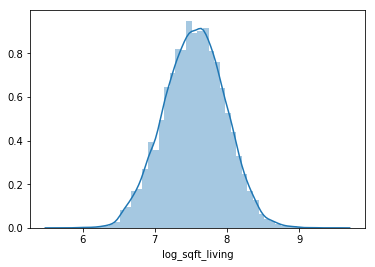

In [693]:
# to make the distribution more bell-shaped
# performed log transformation
data['log_sqft_living'] = data['sqft_living'].apply(np.log)
sns.distplot(data['log_sqft_living'])

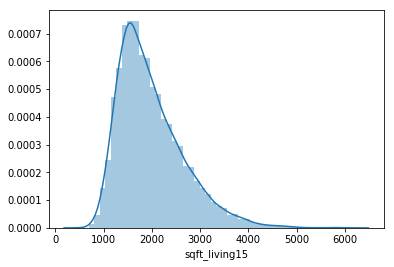

In [694]:
sns.distplot(data['sqft_living15'])

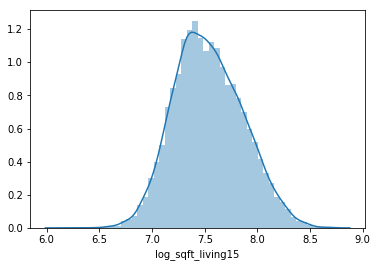

In [695]:
data['log_sqft_living15'] = data['sqft_living15'].apply(np.log)
sns.distplot(data['log_sqft_living15'])

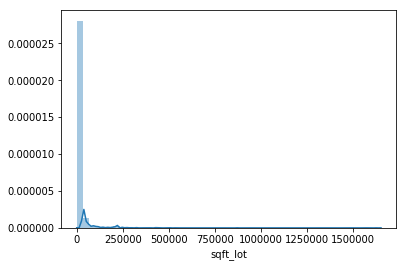

In [696]:
sns.distplot(data['sqft_lot'])

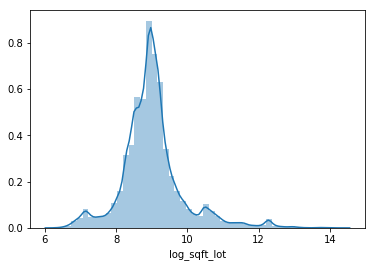

In [697]:
data['log_sqft_lot'] = data['sqft_lot'].apply(np.log)
sns.distplot(data['log_sqft_lot'])

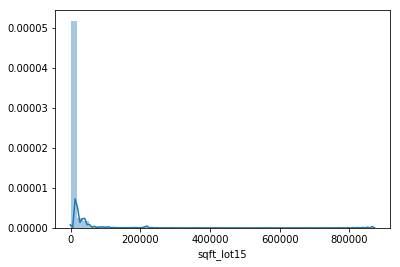

In [698]:
sns.distplot(data['sqft_lot15'])

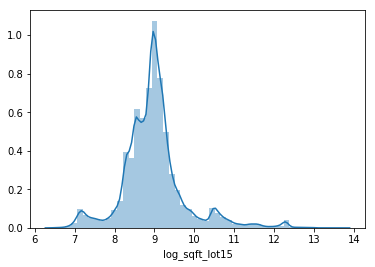

In [699]:
data['log_sqft_lot15'] = data['sqft_lot15'].apply(np.log)
sns.distplot(data['log_sqft_lot15'])

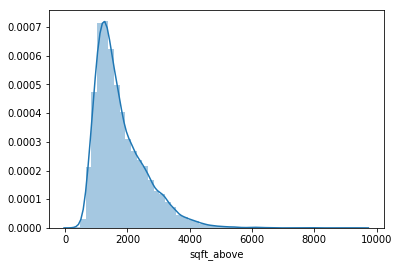

In [700]:
sns.distplot(data['sqft_above'])

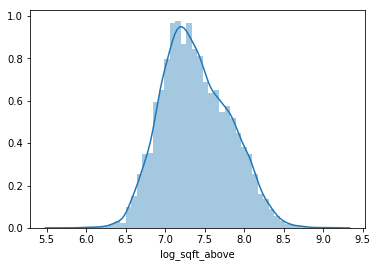

In [701]:
data['log_sqft_above'] = data['sqft_above'].apply(np.log)
sns.distplot(data['log_sqft_above'])

In [702]:
# get train and test datasets back
ntrain = data_train.shape[0]
train = data[:ntrain]
test = data[ntrain:]
# add price back to train
train['price'] = data_train['price']

In [703]:
train.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,...,location#bellevue,location#north,location#seattle,location#south,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_above,price
0,1.75,4,4,2014-10-27,1.0,8,2473350710,47.4568,-122.146,2330,...,0,0,0,1,7.753624,7.687080,9.031692,9.172639,7.753624,390000
1,1.00,3,4,2015-02-11,1.0,7,7100000250,47.5066,-122.377,1400,...,0,0,1,0,7.244228,7.286192,9.072227,9.072227,7.244228,380000
2,1.00,3,3,2015-04-23,1.5,6,1443500725,47.5345,-122.274,1350,...,0,0,1,0,7.207860,7.229839,8.929700,8.918650,7.207860,280000
3,2.50,3,3,2014-08-05,1.0,8,2321059093,47.2984,-122.144,2100,...,0,0,0,1,7.649693,7.192934,12.269085,12.275202,7.649693,506000
4,2.50,3,3,2014-08-12,2.0,7,6675500082,47.7288,-122.227,1600,...,0,1,0,0,7.377759,7.365180,8.965590,9.116469,7.377759,455000


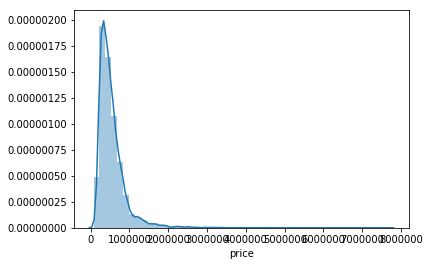

In [704]:
# check histogram of the price distribution
# it is highly right skewed
sns.distplot(train['price'])

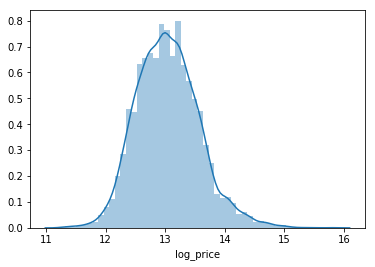

In [705]:
# to make the distribution more bell-shaped
# performed log transformation
train['log_price'] = train['price'].apply(np.log)
sns.distplot(train['log_price'])

In [706]:
train.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,sqft_above,...,location#north,location#seattle,location#south,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15,log_sqft_above,price,log_price
0,1.75,4,4,2014-10-27,1.0,8,2473350710,47.4568,-122.146,2330,...,0,0,1,7.753624,7.687080,9.031692,9.172639,7.753624,390000,12.873902
1,1.00,3,4,2015-02-11,1.0,7,7100000250,47.5066,-122.377,1400,...,0,1,0,7.244228,7.286192,9.072227,9.072227,7.244228,380000,12.847927
2,1.00,3,3,2015-04-23,1.5,6,1443500725,47.5345,-122.274,1350,...,0,1,0,7.207860,7.229839,8.929700,8.918650,7.207860,280000,12.542545
3,2.50,3,3,2014-08-05,1.0,8,2321059093,47.2984,-122.144,2100,...,0,0,1,7.649693,7.192934,12.269085,12.275202,7.649693,506000,13.134292
4,2.50,3,3,2014-08-12,2.0,7,6675500082,47.7288,-122.227,1600,...,1,0,0,7.377759,7.365180,8.965590,9.116469,7.377759,455000,13.028053


In [707]:
feature_cols = ['bedrooms', 'bathrooms', 'log_sqft_living', 'floors', 'waterfront',
                'view', 'condition', 'grade', 'log_sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 
                'log_sqft_living15', 'years_built',
                'location#seattle', 'location#bellevue', 'location#north', 'location#south',
                'month#1', 'month#2', 'month#3', 'month#4', 'month#5', 'month#6', 'month#7', 
                'month#8', 'month#9', 'month#10', 'month#11', 'month#12']
X = train[feature_cols]
y = train['log_price']

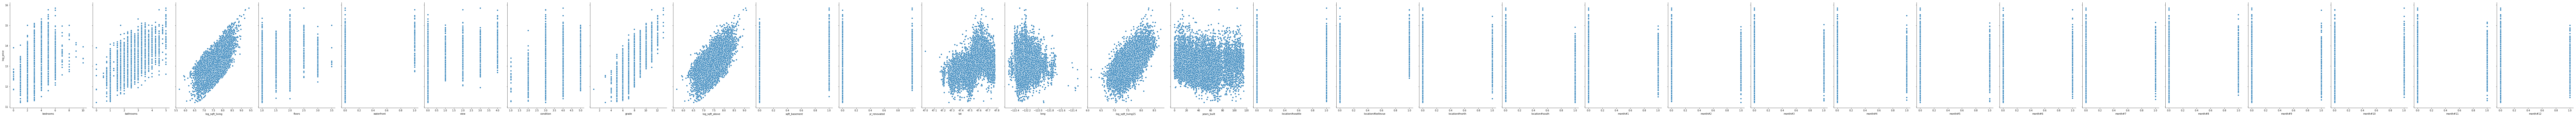

In [708]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(train, x_vars=feature_cols, y_vars='log_price', size=7, aspect=0.7)

## Feature selection and model selection

### Fit a simple linear model

In [713]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2, 16000]

In [714]:
import statsmodels.api as sm
from scipy import stats

for f in feature_cols:
    X = train[f]
    X = X.values.reshape(-1,1)
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2200.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:29:34   Log-Likelihood:                -11526.
No. Observations:               16000   AIC:                         2.306e+04
Df Residuals:                   15998   BIC:                         2.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3568      0.015    814.640      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     786.6
Date:                Thu, 21 Mar 2019   Prob (F-statistic):          5.25e-169
Time:                        15:29:34   Log-Likelihood:                -12173.
No. Observations:               16000   AIC:                         2.435e+04
Df Residuals:                   15998   BIC:                         2.437e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9511      0.005   2460.351      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.75
Date:                Thu, 21 Mar 2019   Prob (F-statistic):           2.54e-05
Time:                        15:29:34   Log-Likelihood:                -12548.
No. Observations:               16000   AIC:                         2.510e+04
Df Residuals:                   15998   BIC:                         2.512e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0378      0.004   2939.921      0.0

### Fit a multiple linear model

In [715]:
X = train[feature_cols]
y = train['log_price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     2199.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:29:38   Log-Likelihood:                 307.81
No. Observations:               16000   AIC:                            -555.6
Df Residuals:                   15970   BIC:                            -325.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -21.6661      2.07

### Forward stepwise feature selection

#### 1st important feature is grade (R-squared = 0.498)

In [716]:
for f in feature_cols:
    if f not in ['grade']:
        X = train[['grade',f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     8223.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:02   Log-Likelihood:                -6900.1
No. Observations:               16000   AIC:                         1.381e+04
Df Residuals:                   15997   BIC:                         1.383e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5322      0.020    530.035      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     8627.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:03   Log-Likelihood:                -6703.5
No. Observations:               16000   AIC:                         1.341e+04
Df Residuals:                   15997   BIC:                         1.344e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1348      0.026    388.305      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.295e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:03   Log-Likelihood:                -4852.6
No. Observations:               16000   AIC:                             9711.
Df Residuals:                   15997   BIC:                             9734.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.8017      0.017    624.

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     7921.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:03   Log-Likelihood:                -7050.5
No. Observations:               16000   AIC:                         1.411e+04
Df Residuals:                   15997   BIC:                         1.413e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6063      0.020    540.717      0.0

#### 2nd important feature is lat (R-squared = 0.636)

In [717]:
for f in feature_cols:
    if f not in ['grade', 'lat']:
        X = train[['grade', 'lat', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     9896.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -4161.3
No. Observations:               16000   AIC:                             8331.
Df Residuals:                   15996   BIC:                             8361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -58.6013      0.856    -68.487      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 1.006e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -4074.8
No. Observations:               16000   AIC:                             8158.
Df Residuals:                   15996   BIC:                             8188.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -54.0709      0.858    -63.039

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     9334.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -4462.6
No. Observations:               16000   AIC:                             8933.
Df Residuals:                   15996   BIC:                             8964.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.3500      0.871    -65.867      0.0

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     9329.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:31:32   Log-Likelihood:                -4465.0
No. Observations:               16000   AIC:                             8938.
Df Residuals:                   15996   BIC:                             8969.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.3908      0.871    -65.917      0.0

#### 3rd important feature is log_sqft_living (R-squared = 0.699)

In [718]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living']:
        X = train[['grade', 'lat','log_sqft_living', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     9320.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:22   Log-Likelihood:                -2931.5
No. Observations:               16000   AIC:                             5873.
Df Residuals:                   15995   BIC:                             5911.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -62.6665      0.796    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     9575.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:22   Log-Likelihood:                -2779.9
No. Observations:               16000   AIC:                             5570.
Df Residuals:                   15995   BIC:                             5608.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -62.1088      0.789    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                 1.012e+04
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:23   Log-Likelihood:                -2463.2
No. Observations:               16000   AIC:                             4936.
Df Residuals:                   15995   BIC:                             4975.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -37.7425      1.096    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     9275.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:23   Log-Likelihood:                -2958.5
No. Observations:               16000   AIC:                             5927.
Df Residuals:                   15995   BIC:                             5965.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -62.6137      0.798    -

#### 4th important feature is years_built (R-squared = 0.736)

In [720]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     8976.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:41:37   Log-Likelihood:                -1863.9
No. Observations:               16000   AIC:                             3740.
Df Residuals:                   15994   BIC:                             3786.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -55.0042      0.762    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     8918.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:41:37   Log-Likelihood:                -1902.1
No. Observations:               16000   AIC:                             3816.
Df Residuals:                   15994   BIC:                             3862.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -54.1591      0.796  

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     8909.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:41:37   Log-Likelihood:                -1908.4
No. Observations:               16000   AIC:                             3829.
Df Residuals:                   15994   BIC:                             3875.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -54.9703      0.764    -

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     8916.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:41:37   Log-Likelihood:                -1903.6
No. Observations:               16000   AIC:                             3819.
Df Residuals:                   15994   BIC:                             3865.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -54.9871      0.764    -

#### 5th important feature is location#bellevue (R-squared = 0.757)

In [721]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     8416.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:                -1158.1
No. Observations:               16000   AIC:                             2330.
Df Residuals:                   15993   BIC:                             2384.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.2452      0.72

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     8312.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:                -1233.0
No. Observations:               16000   AIC:                             2480.
Df Residuals:                   15993   BIC:                             2534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -53.9451      0.74

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     8307.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:                -1236.8
No. Observations:               16000   AIC:                             2488.
Df Residuals:                   15993   BIC:                             2541.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.2310      0.73

strong multicollinearity or other numerical problems.
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     8309.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:42:42   Log-Likelihood:                -1235.6
No. Observations:               16000   AIC:                             2485.
Df Residuals:                   15993   BIC:                             2539.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

#### 6th important feature is view (R-squared = 0.772)

In [722]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7809.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                -671.21
No. Observations:               16000   AIC:                             1358.
Df Residuals:                   15992   BIC:                             1420.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3465      0.70

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     7747.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                -720.41
No. Observations:               16000   AIC:                             1457.
Df Residuals:                   15992   BIC:                             1518.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.5126      0.71

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     7824.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                -659.20
No. Observations:               16000   AIC:                             1334.
Df Residuals:                   15992   BIC:                             1396.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -47.5413      0.99

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     7797.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:43:28   Log-Likelihood:                -680.44
No. Observations:               16000   AIC:                             1377.
Df Residuals:                   15992   BIC:                             1438.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3910      0.70

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     7749.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:                -718.54
No. Observations:               16000   AIC:                             1453.
Df Residuals:                   15992   BIC:                             1515.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3515      0.71

#### 7th importatn feature is floors (R-squared = 0.778)

In [723]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors',
                f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     7058.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:44:09   Log-Likelihood:                -469.10
No. Observations:               16000   AIC:                             956.2
Df Residuals:                   15991   BIC:                             1025.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.3008      0.70

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     7014.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:44:09   Log-Likelihood:                -507.95
No. Observations:               16000   AIC:                             1034.
Df Residuals:                   15991   BIC:                             1103.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -53.6542      0.71

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     7002.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:44:09   Log-Likelihood:                -518.57
No. Observations:               16000   AIC:                             1055.
Df Residuals:                   15991   BIC:                             1124.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.2866      0.70

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     6999.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:44:09   Log-Likelihood:                -521.64
No. Observations:               16000   AIC:                             1061.
Df Residuals:                   15991   BIC:                             1130.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.3177      0.70

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     7004.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:44:10   Log-Likelihood:                -517.38
No. Observations:               16000   AIC:                             1053.
Df Residuals:                   15991   BIC:                             1122.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -54.3327      0.70

#### 8th important features are bathrooms, condition , waterfront and log_sqft_living15 (R-squared = 0.781)

In [724]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     5080.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:28   Log-Likelihood:                 14.280
No. Observations:               16000   AIC:                            -2.560
Df Residuals:                   15987   BIC:                             97.28
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.1811      0.68

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5027.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:29   Log-Likelihood:                -52.670
No. Observations:               16000   AIC:                             131.3
Df Residuals:                   15987   BIC:                             231.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -60.3375      2.05

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5024.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:29   Log-Likelihood:                -56.047
No. Observations:               16000   AIC:                             138.1
Df Residuals:                   15987   BIC:                             237.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3100      0.68

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5024.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:29   Log-Likelihood:                -56.034
No. Observations:               16000   AIC:                             138.1
Df Residuals:                   15987   BIC:                             237.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3083      0.68

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     5025.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:45:29   Log-Likelihood:                -54.410
No. Observations:               16000   AIC:                             134.8
Df Residuals:                   15987   BIC:                             234.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -55.3184      0.68

#### 9th important features are location#seattle and locatio#south (R-squared = 0.793)

In [725]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     4439.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:46:25   Log-Likelihood:                 136.52
No. Observations:               16000   AIC:                            -243.0
Df Residuals:                   15985   BIC:                            -127.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.0912      0.96

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4405.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:46:25   Log-Likelihood:                 88.208
No. Observations:               16000   AIC:                            -146.4
Df Residuals:                   15985   BIC:                            -31.21
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.3953      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4392.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:46:25   Log-Likelihood:                 70.049
No. Observations:               16000   AIC:                            -110.1
Df Residuals:                   15985   BIC:                             5.106
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2299      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4393.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:46:26   Log-Likelihood:                 70.586
No. Observations:               16000   AIC:                            -111.2
Df Residuals:                   15985   BIC:                             4.032
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2656      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4392.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:46:26   Log-Likelihood:                 69.924
No. Observations:               16000   AIC:                            -109.8
Df Residuals:                   15985   BIC:                             5.357
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2487      0.97

#### 10th important features are bedrooms and month#4 (R-squared = 0.795)

In [726]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     4439.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:08   Log-Likelihood:                 136.52
No. Observations:               16000   AIC:                            -243.0
Df Residuals:                   15985   BIC:                            -127.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.0912      0.96

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4405.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:09   Log-Likelihood:                 88.208
No. Observations:               16000   AIC:                            -146.4
Df Residuals:                   15985   BIC:                            -31.21
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.3953      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     4391.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:09   Log-Likelihood:                 67.648
No. Observations:               16000   AIC:                            -105.3
Df Residuals:                   15985   BIC:                             9.908
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2584      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4393.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:09   Log-Likelihood:                 70.586
No. Observations:               16000   AIC:                            -111.2
Df Residuals:                   15985   BIC:                             4.032
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2656      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4392.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:09   Log-Likelihood:                 69.924
No. Observations:               16000   AIC:                            -109.8
Df Residuals:                   15985   BIC:                             5.357
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2487      0.97

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     4393.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:47:10   Log-Likelihood:                 71.434
No. Observations:               16000   AIC:                            -112.9
Df Residuals:                   15985   BIC:                             2.337
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.2778      0.97

#### 11th important features are log_sqft_above, yr_renovated, long and month#3 (R-squared = 0.797)

In [727]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3188.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:48:59   Log-Likelihood:                 303.09
No. Observations:               16000   AIC:                            -564.2
Df Residuals:                   15979   BIC:                            -402.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.9610      2.76

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3168.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:49:00   Log-Likelihood:                 261.97
No. Observations:               16000   AIC:                            -481.9
Df Residuals:                   15979   BIC:                            -320.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -30.0931      2.76

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3167.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:49:00   Log-Likelihood:                 261.79
No. Observations:               16000   AIC:                            -481.6
Df Residuals:                   15979   BIC:                            -320.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -30.0802      2.76

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3168.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:49:00   Log-Likelihood:                 261.92
No. Observations:               16000   AIC:                            -481.8
Df Residuals:                   15979   BIC:                            -320.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -30.0953      2.76

#### 12th imporant feature is sqft_basement (R-squared = 0.800)

In [728]:
for f in feature_cols:
    if f not in ['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3', 'sqft_basement']:
        X = train[['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3', 'sqft_basement', f]]
        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3188.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:51:40   Log-Likelihood:                 303.09
No. Observations:               16000   AIC:                            -564.2
Df Residuals:                   15979   BIC:                            -402.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -23.1026      2.21

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3037.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:51:40   Log-Likelihood:                 304.45
No. Observations:               16000   AIC:                            -564.9
Df Residuals:                   15978   BIC:                            -395.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.9643      2.76

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3036.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:51:40   Log-Likelihood:                 303.30
No. Observations:               16000   AIC:                            -562.6
Df Residuals:                   15978   BIC:                            -393.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.9527      2.76

### Cross-validation

In [729]:
forward_selection_cv = {
                        'M1':['grade'],
                        'M2':['grade', 'lat'],
                        'M3':['grade', 'lat', 'log_sqft_living'],
                        'M4':['grade', 'lat', 'log_sqft_living', 'years_built'],
                        'M5':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue'],
                        'M6':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view'],
                        'M7':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors'],
                        'M8':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                                'condition', 'waterfront', 'log_sqft_living15'],
                        'M9':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south'],
                        'M10':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                                'month#4'],
                        'M11':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3'],
                        'M12':['grade', 'lat', 'log_sqft_living', 'years_built', 'location#bellevue', 'view', 'floors', 'bathrooms',
                                'condition', 'waterfront', 'log_sqft_living15', 'location#seattle', 'location#south', 'bedrooms',
                                'month#4', 'log_sqft_above', 'yr_renovated', 'long', 'month#3', 'sqft_basement']
}

In [730]:
# check cross-validation scores with selected features
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
for model in forward_selection_cv.keys():
    X = train[forward_selection_cv[model]]
    scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
    print(model, -scores.mean(), scores.std())

M1 0.1413920706340241 0.004142950123805069
M2 0.10235932034333632 0.0035578352674302724
M3 0.08480641533387889 0.003360347583934022
M4 0.07436773868091197 0.0027132045234997747
M5 0.0683915025389287 0.0024616106528112585
M6 0.06414191101586629 0.002607235776419015
M7 0.06257221220715685 0.002586775929332824
M8 0.05908073384942721 0.0020981203147704746
M9 0.058185772386467716 0.0020777593281051015
M10 0.05735867833696 0.0021771421006499293
M11 0.05684533938236752 0.002279647394205113
M12 0.05655834070510244 0.0022629727014738046


### Fit a linear regression with selected features

In [731]:
X = train[forward_selection_cv['M12']]
y = train['log_price']

In [732]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [733]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     2586.
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:54:47   Log-Likelihood:                 259.10
No. Observations:               12800   AIC:                            -476.2
Df Residuals:                   12779   BIC:                            -319.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.1051      3.09

In [734]:
# check MSE and RMSE
y_pred = linreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 0.05705179621511625
RMSE = 0.23885517833012593


### Fit a Ridge regression

In [735]:
from sklearn.linear_model import Ridge

ridreg = Ridge(alpha=1)
ridreg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [736]:
# check R-squared
print('R-squared =', ridreg.score(X_train, y_train))

R-squared = 0.801896635263136


In [737]:
# check MSE and RMSE
y_pred_r = ridreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred_r)
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 0.05704693782024202
RMSE = 0.23884500794498933


### Fit a Lasso regression

In [738]:
from sklearn.linear_model import Lasso

lasreg = Lasso(alpha=0.001)
lasreg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [739]:
# check R-squared
print('R-squared =', lasreg.score(X_train, y_train))

R-squared = 0.8001284705894587


In [740]:
# check MSE and RMSE
y_pred_la = lasreg.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred_la)
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 0.0573237066663123
RMSE = 0.2394236969606649


### Polynomial regression 

In [741]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2
polyfeat = PolynomialFeatures(degree=2)
X_train_p2 = polyfeat.fit_transform(X_train)
X_test_p2 = polyfeat.fit_transform(X_test)
poly2 = LinearRegression().fit(X_train_p2, y_train)

In [742]:
# check R-squared
print('R-squared =', poly2.score(X_train_p2, y_train))

R-squared = 0.8548725088333721


In [743]:
# check MSE and RMSE
y_pred = poly2.predict(X_test_p2)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 0.042331631296036655
RMSE = 0.2057465219536813


In [744]:
X2 = sm.add_constant(X_train_p2)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     341.5
Date:                Thu, 21 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:56:17   Log-Likelihood:                 2250.5
No. Observations:               12800   AIC:                            -4065.
Df Residuals:                   12582   BIC:                            -2439.
Df Model:                         217                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.73e+04   2952.582     -5.858      0.0

In [746]:
# predict price for test dataset
test_p2 = polyfeat.fit_transform(test[forward_selection_cv['M12']])
test_predict = poly2.predict(test_p2)
np.exp(test_predict)

array([823498.97649145, 615389.75239797, 388755.37539665, ...,
       465733.21436221, 280089.28901314, 274495.47544197])

In [73]:
# degree = 3
polyfeat = PolynomialFeatures(degree=3)
X_train_p3 = polyfeat.fit_transform(X_train)
X_test_p3 = polyfeat.fit_transform(X_test)
poly3 = LinearRegression().fit(X_train_p3, y_train)

In [74]:
# check R-squared
print('R-squared =', poly3.score(X_train_p3, y_train))

R-squared = 0.8463463458099468


In [75]:
# check MSE and RMSE
y_pred = poly3.predict(X_test_p3)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE =', mse)
print('RMSE =', rmse)

MSE = 0.058023132383377744
RMSE = 0.24087991278514226


In [76]:
X2 = sm.add_constant(X_train_p3)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     377.9
Date:                Fri, 01 Mar 2019   Prob (F-statistic):               0.00
Time:                        11:18:16   Log-Likelihood:                 2008.0
No. Observations:               12800   AIC:                            -3638.
Df Residuals:                   12611   BIC:                            -2229.
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.065e-10   1.21e-09     -0.586      0.5

## Predict price for test dataset

#### Based on R-squared(0.839) and RMSE(0.219), we decide to select polynomial regression (degree=2) to predict the price for test_set

In [77]:
# write results to csv
d = {'id': test.id, 'price': np.exp(test_predict)}
df = pd.DataFrame(d)
export_csv = df.to_csv (r'/Users/alexis/Desktop/test_predict.csv', index = None, header=True) 